# Анализ рынка видеоигр с целью планирования рекламной кампании.

### План выполнения работы:

1. Предобработка данных.
2. Исследовательский анализ данных:
 - Выбор актуальных данных
 - Выбор потенциально прибыльных платформ
 - Выявление зависимости между продажами и отзывами пользователей и критиков.
 - Оценка распределения продаж по жанрам. 
 - Составление портрета пользователя каждого региона (NA, EU, JP)
3. Проверка гипотез:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. 
4. Общий вывод.

### Описание данных:

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы долларов)
 - EU_sales — продажи в Европе (миллионы долларов)
 - JP_sales — продажи в Японии (миллионы долларов)
 - Other_sales — продажи в других странах (миллионы долларов)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1. Предобработка данных

Загрузим необходимые нам библиотеки и выберем опции:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st

Прочитаем файл /datasets/games.csv и сохраним его в переменной games_data. Получим первые 15 строк таблицы:

In [2]:
games_data = pd.read_csv('/datasets/games.csv')
games_data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим последние 15 строк таблицы:

In [3]:
games_data.tail(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


Получим общую информацию о данных:

In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод:

Всего в таблице 11 столбцов, из которых 6 с числовыми данными и 5 с объектами. 

В данных есть следующие проблемы, это:
 - пропущенные значения в столбцах "Name", "Year_of_Release", "Critic_Score", "User_Score" и "Rating";
 - наличие значений "tbd" в столбце с числовыми данными (оценкой пользователей);
 - несоответствие типа данных значениям.
   Существуют разные способы обработки пропущенных значений:
 - удаление строк с пропущенными значениями;
 - заполнение средним / медианным значением или модой;
 - оставить пропущенные значения, заменив их на "маркер".

Для выбора подходящего нам метода, рассмотрим пропуски в данных более детально.

Для начала приведем названия столбцов к нижнему регистру:

In [5]:
games_data.columns = games_data.columns.str.lower()
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбце с оценкой пользователей присутствует аббревиатура "tbd", что расшифровывается как "to be determined" и переводится "подлежит определению". Т.е. рейтинга пользователей еще не известен. Заменим значения "tbd" на NaN и переведем тип объекта в числовой:

In [6]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.nan).astype(float)

Строки с пропущенными значениями в столбце "year_of_release" составляют только 1,6 % от общего объема данных. Удалим данные строки и приведем оставшиеся значения в столбце к целочисленному формату:

In [7]:
games_data = games_data.dropna(axis='index', how='any', subset=['year_of_release'])
games_data['year_of_release'] = games_data['year_of_release'].astype(int)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим на строки с пропущенными значениями в столбце названия игры:

In [8]:
nan_row = games_data[games_data.name.isna()]
nan_row

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По этим строкам много пропущенных значений и год, неактуальный для прогноза на 2017 год. Удалим эти строки:

In [9]:
games_data.drop([659,14244], inplace=True)

Пропуски в остальных столбцах заменим на маркер "-1", т.к. удаление строк или замена их на какие-либо значения могут сильно исказить результаты исследования:

In [10]:
games_data = games_data.fillna(-1)

Проверим данные на наличие дубликатов:

In [11]:
games_data.duplicated().sum()

0

Получим общую информацию по итоговой таблице:

In [12]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## 2. Исследовательский анализ данных

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец:

In [13]:
games_data['sum_sales']=games_data.iloc[:,4:8].sum(axis=1)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


Посмотрим сколько игр выпускалось в разные годы:

In [14]:
gd_count = games_data.pivot_table('sum_sales', index='year_of_release', aggfunc='count').reset_index()
gd_count

,year_of_release,sum_sales
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


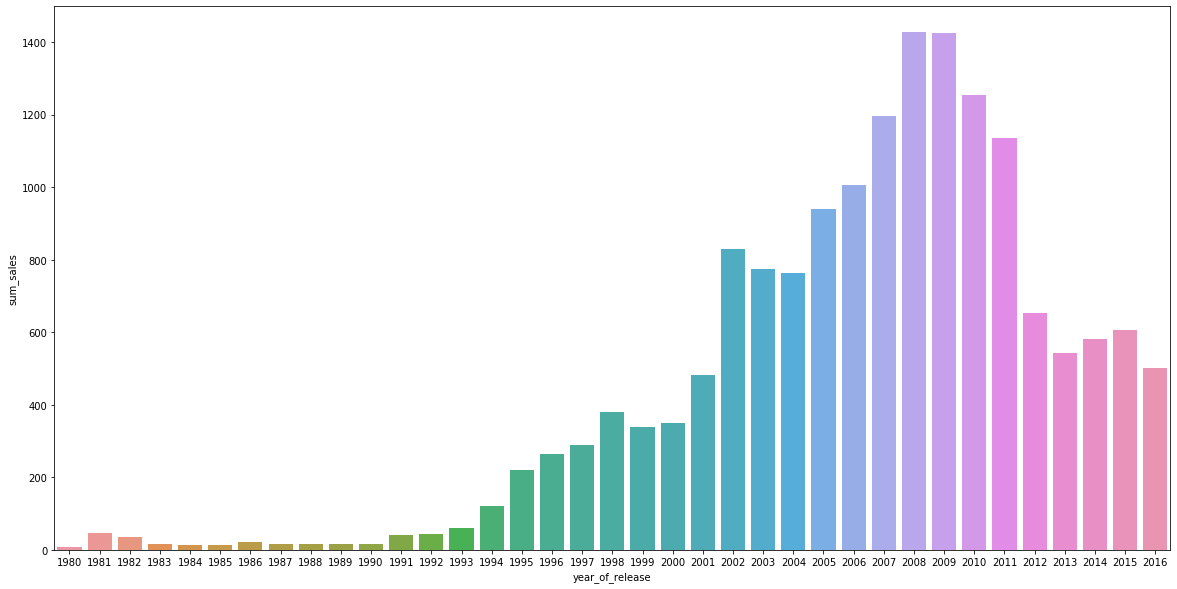

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x='year_of_release',y='sum_sales',data=gd_count)

#### Вывод:

По количеству выпускаемых игр данные можно условно разделить на 4 периода: до 1994 года, с 1994 до 2002, с 2002 до 2012 и с 2012 по настоящее время. Для прогноза на 2017 год возьмем данные за наиболее актуальный период, т.е. с 2012 по 2016.

Посмотрим по каким платформам наибольшая суммарная выручка:

In [16]:
games_data.pivot_table('sum_sales', index='platform', aggfunc='sum').reset_index()

,platform,sum_sales
0,2600,86.48
1,3DO,0.10
2,3DS,257.81
3,DC,15.95
4,DS,802.78
5,GB,254.43
6,GBA,312.88
7,GC,196.73
8,GEN,28.35
9,GG,0.04


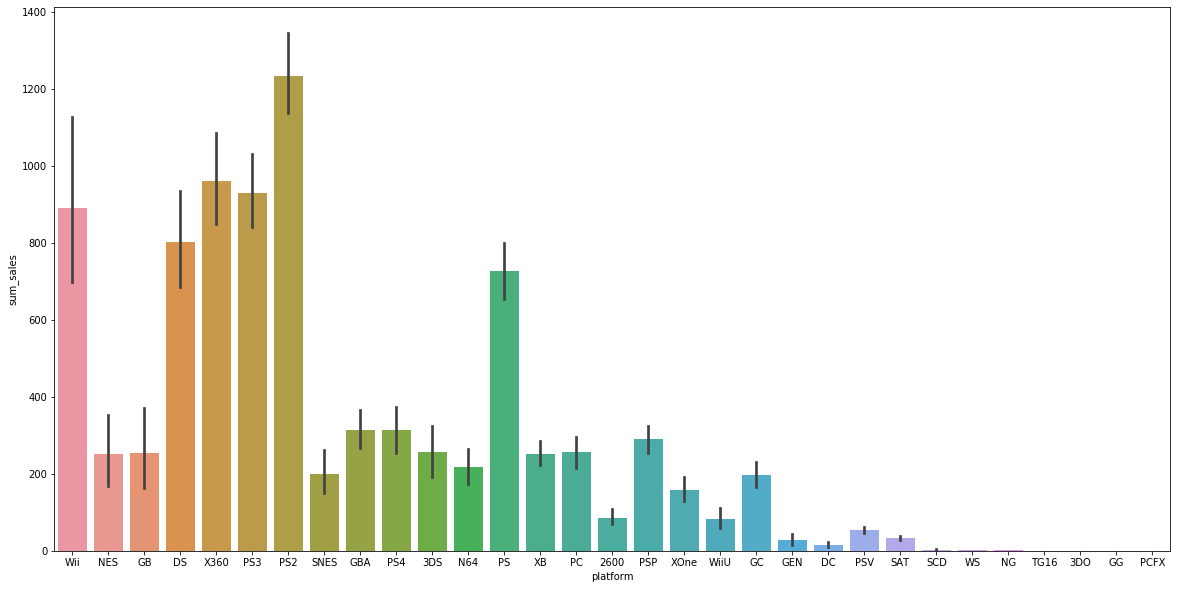

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x='platform',y='sum_sales',data=games_data,estimator=sum)

По суммарной выручке заметно выделяется платформа PS2, затем идут X360 и PS3 соответственно. На примере этих платформ рассмотрим как менялась выручка по годам.

Отфильтруем данные по платформе PS2 и построим наглядную иллюстрацию суммарных продаж по годам:

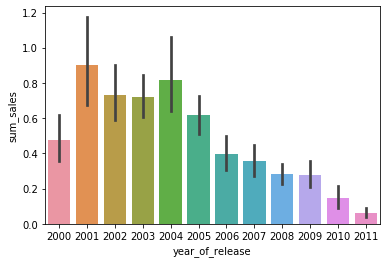

In [18]:
games_data_ps2 = games_data[games_data['platform'] == 'PS2']
sns.barplot(x='year_of_release',y='sum_sales',data=games_data_ps2)

То же самое проделаем для следующих двух платформ:

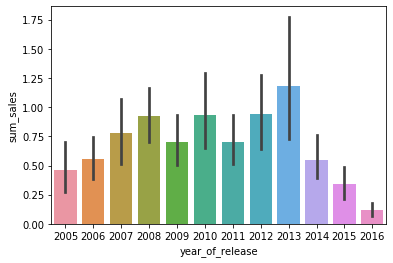

In [19]:
games_data_x360 = games_data[games_data['platform'] == 'X360']
sns.barplot(x='year_of_release',y='sum_sales',data=games_data_x360)

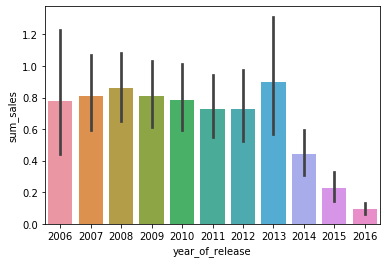

In [20]:
games_data_ps3 = games_data[games_data['platform'] == 'PS3']
sns.barplot(x='year_of_release',y='sum_sales',data=games_data_ps3)

Небольшая выручка может говорить также и о том, что платформа вышла относительно недавно. Поэтому для более полного анализа возьмем еще две более поздние платформы: PS. 

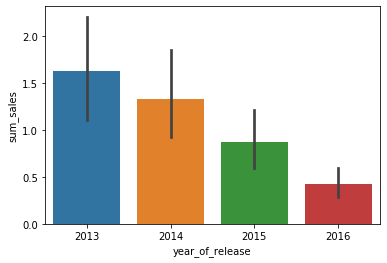

In [21]:
games_data_ps4 = games_data[games_data['platform'] == 'PS4']
sns.barplot(x='year_of_release',y='sum_sales',data=games_data_ps4)

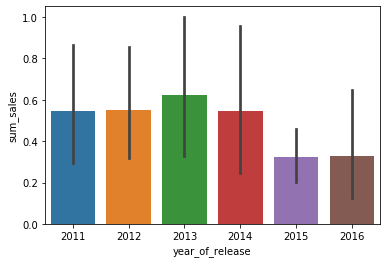

In [22]:
games_data_3ds = games_data[games_data['platform'] == '3DS']
sns.barplot(x='year_of_release',y='sum_sales',data=games_data_3ds)

#### Вывод:

При длительном цикле существования платформ (в среднем от 10 лет), новые появляются достаточно часто - в среднем раз в 2 года.
По нашей выборке, до 2013 года выручка от продаж была более менее стабильна, а после пика в 2013ом, начала резко снижаться. Наибольшая сумма выручка пришлась на 2013 год, несмотря на то, что игр стало выпускаться значительно меньше. Например, в 2011 году было выпущено 1136 игр, что более чем в два раза больше, чем в 2013 (544). Такое различие в выручке может быть связано с выходом какой-то наиболее ожидаемой и популярной игры в этот год, что повлияло на объем продаж. 

Возьмем за актуальный период данные с 2012 года и посмотрим как изменился топ лидирующих по суммарной выручке платформ:

In [23]:
games_data = games_data.query('year_of_release > 2011')
games_data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

По продажам с 2012 года лидируют PS4, PS3, X360. Если сравнивать с данными за весь период, то к двум лидерам продаж добавилась еще PS4. Для более детального рассмотрения сформируем сводную таблицу по продажам каждой платформы с разбивкой по годам:

In [24]:
games_data.pivot_table(index=('platform', 'year_of_release'), values='sum_sales', aggfunc='sum')

sum_sales
platform year_of_release           
3DS      2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2012                 11.01
         2013                  1.54
PC       2012                 23.22
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2012                107.36
         2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2012                  7.69
         2013                  3.14
         2014                  0.24
         2015                  0.12
PSV      2012                 16.19
         2013                 10.59
         2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2012                 21.71
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2012                 17.56
         2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

По тем же данным построим наглядную иллюстрацию:

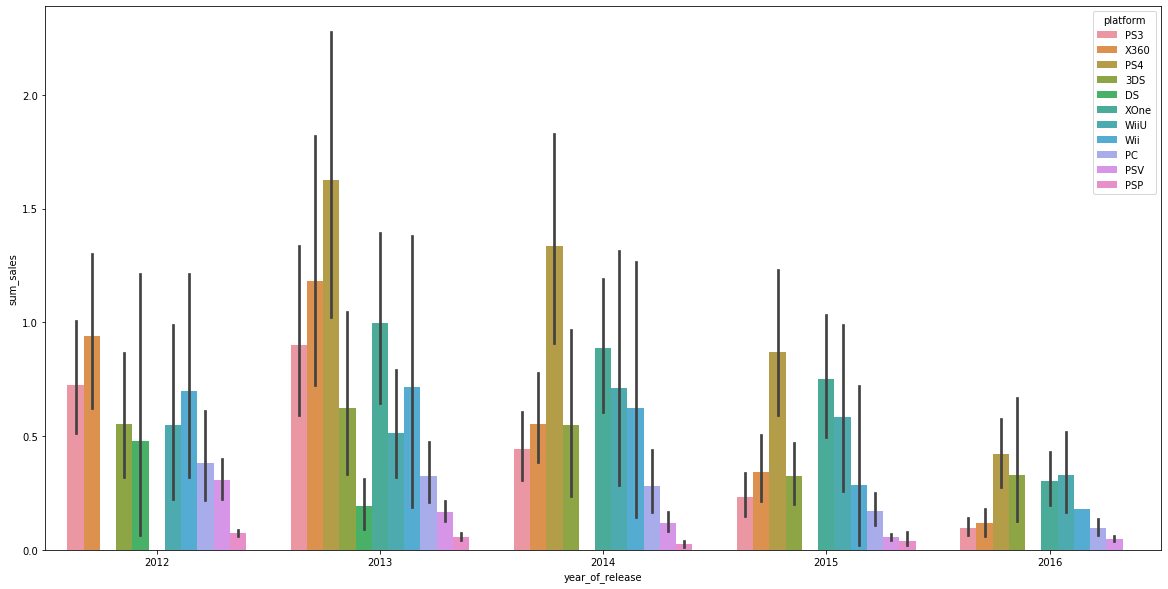

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x="year_of_release", y="sum_sales", hue="platform", data=games_data)

#### Вывод:

По графику видно, что некоторые игры на некоторых платформах перестали выпускаться к 2016 году - на таких, как DS (в 2013 году) и PSP (в 2015). Всё большую популярность набирают платформы XOne и WiiU. Наиболее перспективными кажутся PS4, XOne и WiiU.

Для дальнейшего анализа очистим данные от устаревших платформ: 

In [26]:
games_data = games_data.query('platform != "DS" & platform != "PSP"')

Построим график «ящик с усами» по глобальным продажам потенциально прибыльных платформ:

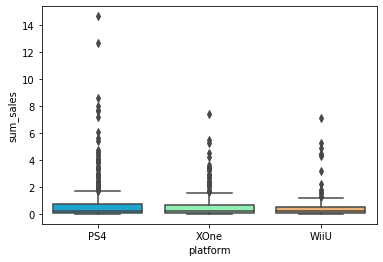

In [27]:
top_platforms_data = (games_data[games_data['platform'].isin(['PS4', 'XOne', 'WiiU'])]).reset_index(drop=True)
sns.boxplot(x="platform", y="sum_sales", data=top_platforms_data, palette='rainbow')

Получим описание данных по каждой платформе:

In [28]:
ps4 = games_data[games_data['platform'] == 'PS4']
ps4['sum_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

In [29]:
xone = games_data[games_data['platform'] == 'XOne']
ps4['sum_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

In [30]:
wiiu = games_data[games_data['platform'] == 'WiiU']
wiiu['sum_sales'].describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: sum_sales, dtype: float64

#### Вывод:

По графику видно, что несмотря на то, что платформы PS4 и XOne вышли позже (в 2013 году) их суммарные продажи выше, чем у WiiU. Лидером продаж из них является PS4, но при этом медианные значения платформ XOne и WiiU равны (0.22 млн $) и на 0.02 больше, чем у PS4. В то же время средняя выручка по платформам составила 0.8, 0,65 и 0,56 для PS4, XOne и WiiU соответственно. Можно предположить, что такое различие в суммарной выручке, в большей степени, образовалось за счет прибыли от выпуска популярных игр эксклюзивно на конкретной платформе.  

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков на примере PS4. Отфильтруем данные по платформе PS4 и отбросим минусовые значения. Посчитаем корреляцию:

In [31]:
ps4_platforms_data = top_platforms_data.query('critic_score >= 0 & user_score >= 0 & platform == "PS4"')
ps4_platforms_data = ps4_platforms_data[['critic_score', 'user_score', 'sum_sales']]
ps4_platforms_data.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_sales,0.405895,-0.033625,1.000000


Построим диаграмму рассеяния для оценки критиков и суммарных продаж:

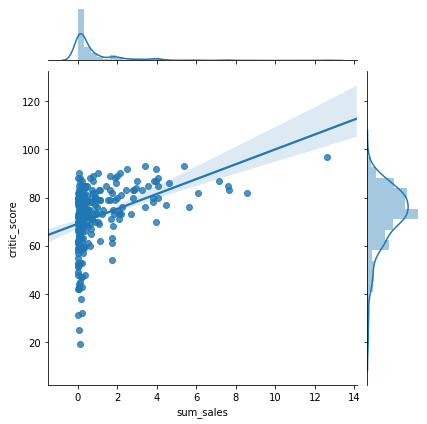

In [32]:
sns.jointplot(x='sum_sales', y='critic_score', data=ps4_platforms_data, kind='reg')

Построим диаграмму рассеяния для оценки пользователей и суммарных продаж:

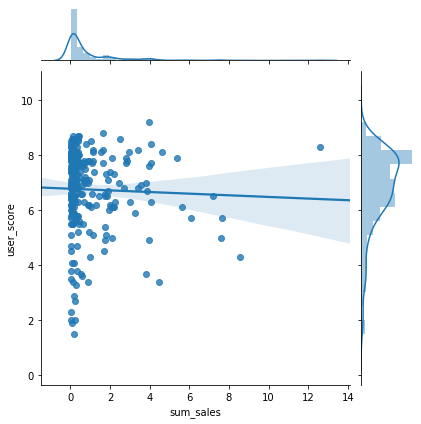

In [33]:
sns.jointplot(x='sum_sales', y='user_score', data=ps4_platforms_data, kind='reg')

Рассмотрим то же самое на платформе XOne:

In [34]:
xone_platforms_data = top_platforms_data.query('critic_score >= 0 & user_score >= 0 & platform == "XOne"')
xone_platforms_data = xone_platforms_data[['critic_score', 'user_score', 'sum_sales']]
xone_platforms_data.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
sum_sales,0.410422,-0.094003,1.000000


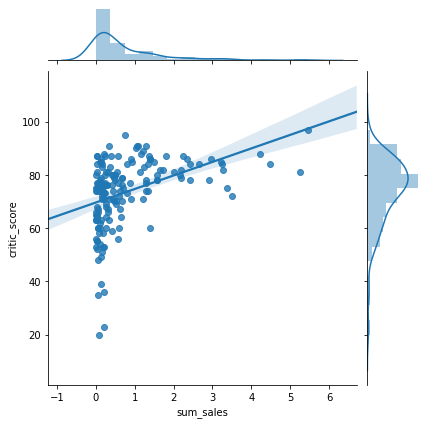

In [35]:
sns.jointplot(x='sum_sales', y='critic_score', data=xone_platforms_data, kind='reg')

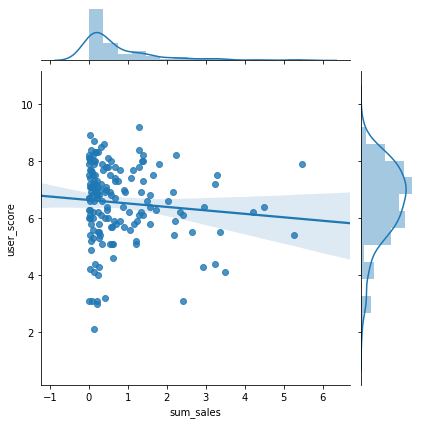

In [36]:
sns.jointplot(x='sum_sales', y='user_score', data=xone_platforms_data, kind='reg')

Теперь для платформы WiiU:

In [37]:
wiiu_platforms_data = top_platforms_data.query('critic_score >= 0 & user_score >= 0 & platform == "WiiU"')
wiiu_platforms_data = wiiu_platforms_data[['critic_score', 'user_score', 'sum_sales']]
wiiu_platforms_data.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.770080,0.350882
user_score,0.770080,1.000000,0.391848
sum_sales,0.350882,0.391848,1.000000


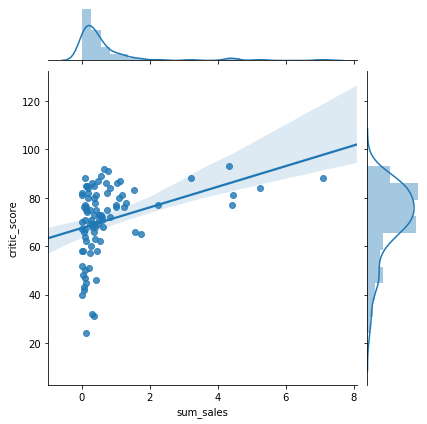

In [38]:
sns.jointplot(x='sum_sales', y='critic_score', data=wiiu_platforms_data, kind='reg')

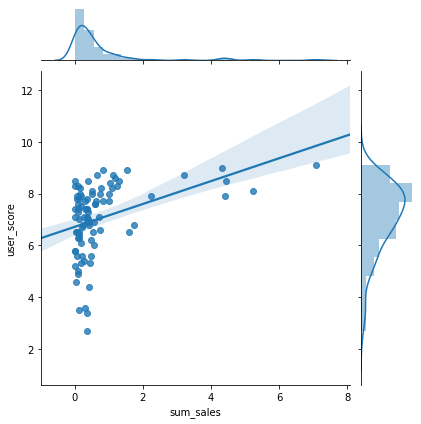

In [39]:
sns.jointplot(x='sum_sales', y='user_score', data=wiiu_platforms_data, kind='reg')

#### Вывод:

Основываясь на расчетах можно сделать вывод о том, что оценки пользователей, в большинстве случаев, не оказывают влияния на суммарные продажи, в то время как оценки критиков оказывают среднее влияние. Это может быть связано с тем, что критики имеют возможность оценить игру раньше, чем пользователи. А уже пользователи, в свою очередь, при выборе игры будут ориентироваться на их рейтинг. Также оценки пользователей обычно более субъективны. Например, на их оценку может повлиять сравнение с более ранней и более привычной версией игры или их собственные ожидания. Для платформы WiiU результаты отличаются: здесь оказывают среднее влияние как и пользовательский рейтинг, так и рейтинг критиков. Причем, рейтинг пользователей даже в большей степени. Исходя из того, что платформа WiiU - японского производства и большинство аудитории сосредоточено в этой стране, можно предположить, что такие итоги обусловлены спецификой продаж в данной страны и менталитетом местного населения.

Посмотрим на общее распределение игр по жанрам:

In [40]:
(top_platforms_data.groupby('genre')['sum_sales'].sum()).sort_values(ascending = False)

genre
Shooter         154.90
Action          152.48
Sports           85.51
Role-Playing     42.43
Platform         30.15
Racing           29.80
Misc             28.08
Fighting         17.37
Adventure         9.19
Strategy          2.28
Simulation        2.12
Puzzle            1.34
Name: sum_sales, dtype: float64

Посмотрим на количество игр по жанрам:

In [41]:
(top_platforms_data.groupby('genre')['sum_sales'].count()).sort_values(ascending = False)

genre
Action          293
Sports           92
Shooter          89
Role-Playing     72
Misc             61
Adventure        45
Racing           42
Platform         34
Fighting         30
Strategy         12
Simulation       11
Puzzle            5
Name: sum_sales, dtype: int64

#### Вывод:

Наиболее популярными оказались активные жанры игры, такие как Action, Shooter и Sports. Симуляторы, стратегии и пазлы пользуются наименьшим спросом из всех. Думаю наибольшее влияние на такое формирование продаж оказывают затраты на производство и целевая аудитория. Можно предположить, что наибольшая часть продаж приходится на подростков и студентов мужского пола - отсюда и такие жанры в топе; в то время как девушки и взрослые в целом играют гораздо реже.

### 2.1 Портрет пользователя Северной Америки

Определим для пользователей Северной Америки самые популярные платформы:

In [42]:
top_platforms_na = games_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values('na_sales', ascending=False).head()
top_platforms_na

,platform,na_sales
7,X360,140.05
3,PS4,108.74
2,PS3,103.38
8,XOne,93.12
0,3DS,55.31


Напишем функцию для построения графика, отражающего доли в продажах:

In [43]:
def func(pct, data):
    absolute = int(pct/100.*np.sum(data))
    return "{:.1f}% ({:d})".format(pct, absolute)

def painting(data, categories):
    fig, ax = plt.subplots(figsize=(10, 6))
    wedges, texts, autotexts = ax.pie(data, 
                               autopct=lambda pct: func(pct, data),
                               textprops=dict(color="w"),
                               colors=plt.cm.Dark2.colors)

    ax.legend(wedges, categories, title="Platform", loc="center left", bbox_to_anchor=(1, 0, 0, 1))
    plt.setp(autotexts, size=10, weight=600)
    ax.set_title("TOP-5 platforms")
    plt.show()

Применим функцию к нашим данным:

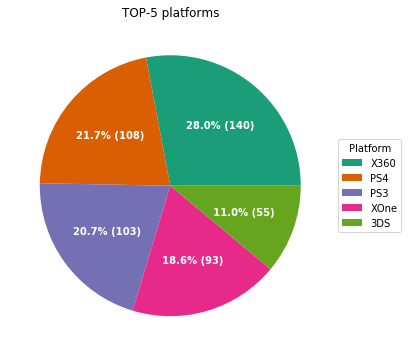

In [44]:
painting(top_platforms_na['na_sales'], top_platforms_na['platform'])

Определим для пользователей Северной Америки самые популярные жанры:

In [45]:
top_genres_na = top_platforms_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values('na_sales', ascending=False).head()
top_genres_na

,genre,na_sales
8,Shooter,71.86
0,Action,63.89
10,Sports,36.87
7,Role-Playing,16.55
3,Misc,13.41


Построим график, отражающий доли самых популярных жанров:

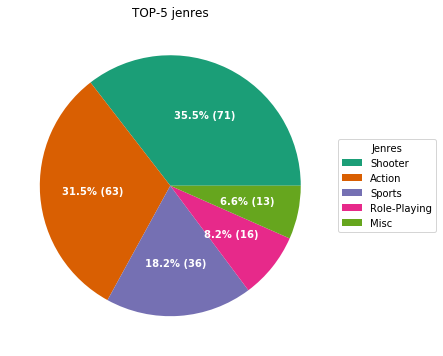

In [46]:
def painting2(data, categories):
    fig, ax = plt.subplots(figsize=(10, 6))
    wedges, texts, autotexts = ax.pie(data, 
                               autopct=lambda pct: func(pct, data),
                               textprops=dict(color="w"),
                               colors=plt.cm.Dark2.colors)

    ax.legend(wedges, categories, title="Jenres", loc="center left", bbox_to_anchor=(1, 0, 0, 1))
    plt.setp(autotexts, size=10, weight=600)
    ax.set_title("TOP-5 jenres")
    plt.show()
painting2(top_genres_na['na_sales'], top_genres_na['genre'])

Рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Для начала отбросим строки с пропущенными значениями в рейтинге:

In [47]:
esrb = games_data.query('rating != -1')

Получим суммарные продажи по возрастному рейтингу:

In [48]:
esrb_na = esrb.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values('na_sales', ascending=False).head()
esrb_na

,rating,na_sales
2,M,231.57
0,E,113.44
1,E10+,75.09
3,T,66.02


Построим график по возрастной классификации игр ESRB:

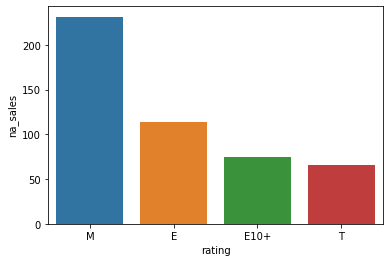

In [49]:
sns.barplot(x='rating',y='na_sales',data=esrb_na)

#### Вывод:

Самые популярные платформы в Северной Америке - X360 с долей от продаж топ-5 платформ 28%, PS4 с долей 21.7% и PS3 с долей 20.7%. Самые популярные жанры - Shooter с долей от продаж топ-5 жанров 35.5% и Action с долей 31.5%. Наиболее продаваемые игры с классификацией M (Для взрослых). Это игры, которые могут содержать насилие, большое количество крови и ненормативную лексику. Что в целом подходит под описание лидирующих жанров. Скорее на продажи большее влияние оказывает жанр, а не рейтинг ESRB. Так как пользователи игр зачастую не соответствуют указанным возрастным ограничениям.  

### 2.2 Портрет пользователя Европы

Проделаем то же самое для пользователей Европы:

In [50]:
top_platforms_eu = games_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values('eu_sales', ascending=False).head()
top_platforms_eu

,platform,eu_sales
3,PS4,141.09
2,PS3,106.86
7,X360,74.52
8,XOne,51.59
0,3DS,42.64


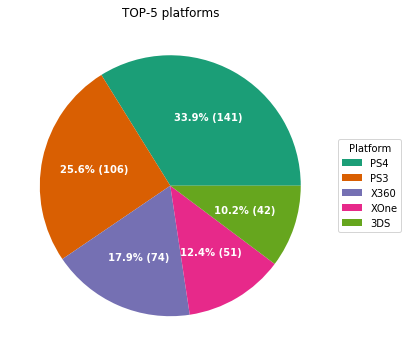

In [51]:
painting(top_platforms_eu['eu_sales'], top_platforms_eu['platform'])

In [52]:
top_genres_eu = top_platforms_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values('eu_sales', ascending=False).head()
top_genres_eu

,genre,eu_sales
0,Action,62.03
8,Shooter,58.71
10,Sports,35.63
7,Role-Playing,16.16
6,Racing,14.56


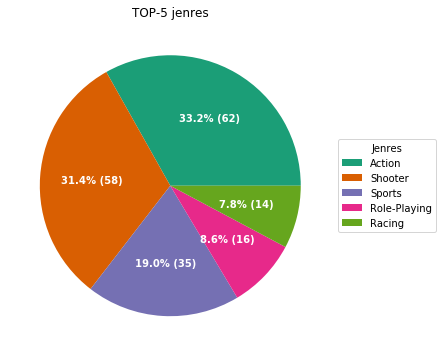

In [53]:
painting2(top_genres_eu['eu_sales'], top_genres_eu['genre'])

In [54]:
esrb_eu = esrb.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values('eu_sales', ascending=False)
esrb_eu

,rating,eu_sales
2,M,193.96
0,E,111.79
1,E10+,54.84
3,T,52.96


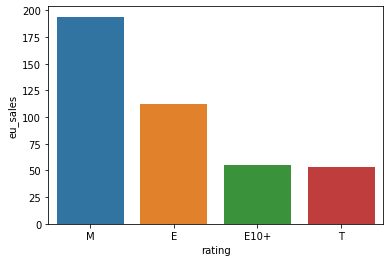

In [55]:
sns.barplot(x='rating',y='eu_sales',data=esrb_eu)

#### Вывод:

Самые популярные платформы в Европе - PS4 с долей от продаж топ-5 платформ 33.9%, PS3 с долей 25.6% и X360 с долей 17.9%. Самые популярные жанры - Action с долей от продаж топ-5 жанров 33.2% и Shooter с долей 31.4%. Наиболее продаваемые игры с классификацией M (Для взрослых).

### 2.3 Портрет пользователя Японии

Проделаем то же самое для пользователей Японии:

In [56]:
top_platforms_jp = games_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values('jp_sales', ascending=False).head()
top_platforms_jp

,platform,jp_sales
0,3DS,87.79
2,PS3,35.29
4,PSV,21.04
3,PS4,15.96
6,WiiU,13.01


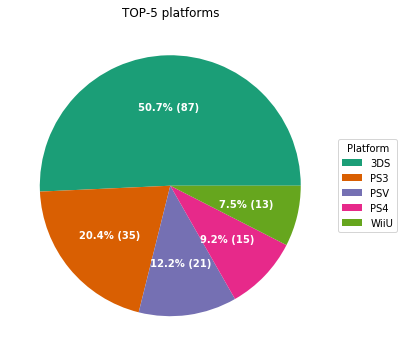

In [57]:
painting(top_platforms_jp['jp_sales'], top_platforms_jp['platform'])

In [58]:
top_genres_jp = top_platforms_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values('jp_sales', ascending=False).head()
top_genres_jp

,genre,jp_sales
0,Action,7.04
8,Shooter,4.51
7,Role-Playing,4.45
4,Platform,4.17
3,Misc,2.88


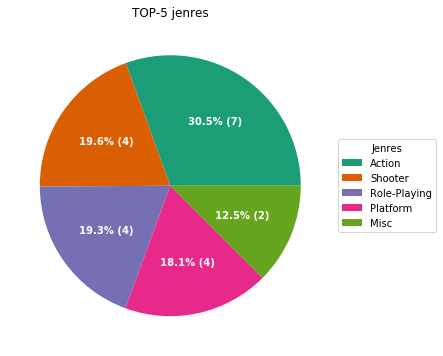

In [59]:
painting2(top_genres_jp['jp_sales'], top_genres_jp['genre'])

In [60]:
esrb_jp = esrb.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values('jp_sales', ascending=False)
esrb_jp

,rating,jp_sales
0,E,27.62
3,T,25.76
2,M,21.20
1,E10+,8.19


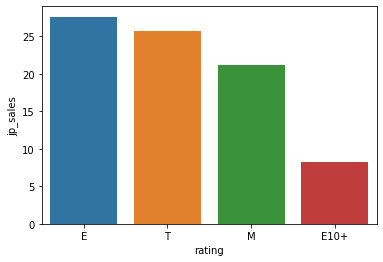

In [61]:
sns.barplot(x='rating',y='jp_sales',data=esrb_jp)

#### Вывод:

В то время как различия между пользователями в Америке и Европе незначительны, в Японии данные кардинально отличаются. Более половины от суммарных продаж топовых платформ занимает 3DS (50.7%), на втором месте PS3 с долей 20.4%. Самые популярные жанры - Action, Shooter и Role-Playing и соответствующие рейтинги ESRB - E («Для всех»), T («Подросткам») и M ("Для взрослых"). 

## 3. Проверка гипотез

Подготовим данные для проверки гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

Вспомним нашу таблицу с данными с 2012 года:

In [62]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Отбросим строки с минусовыми данными в оценках пользователей:

In [63]:
games_data_pl = games_data.query('user_score >= 0')

Построим график по оценкам пользователей по платформе XOne:

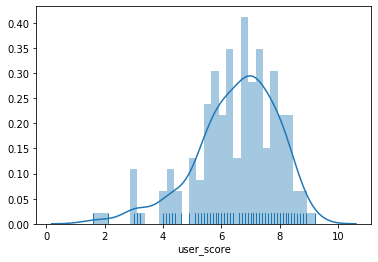

In [64]:
games_data_xb = games_data_pl[games_data_pl['platform'] == 'XOne']
sns.distplot(games_data_xb['user_score'], bins = 30, rug=True)

Получим описание:

In [65]:
games_data_xb['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Проделаем то же самое для платформы PC:

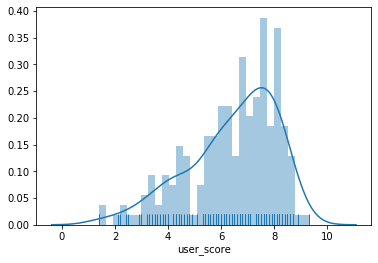

In [66]:
games_data_pc = games_data_pl[games_data_pl['platform'] == 'PC']
sns.distplot(games_data_pc['user_score'], bins = 30, rug=True)

In [67]:
games_data_pc['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Сформируем нулевую гипотезу Н0 о том, что средние пользовательские рейтинги платформ Xbox One и PC равны и альтернативную гипотезу Н1 о том, что средние пользовательские рейтинги платформ Xbox One и PC отличаются. Уровень статистической значимости установим равный 0.05.

Сначала проверим с помощью критерия Флигнера-Килина, равны ли дисперсии:

In [68]:
result = st.fligner(games_data_xb['user_score'], games_data_pc['user_score'])
print('p-value: ', result[1])

p-value:  0.010640269486743261


Значение p-value меньше альфа, гипотезу о равенстве дисперсий отвергаем. Поэтому гипотезу о равенстве средних значений будем проверять с помощью ttest_ind с опцией equal_var=False:

In [69]:
result = st.ttest_ind(games_data_xb['user_score'], games_data_pc['user_score'], equal_var=False)
print('p-value: ', result[1])

p-value:  0.5489537965134912


Значение p-value больше критического уровня статистической значимости, соответственно нулевую гипотезу не отвергаем.

Подготовим данные для проверки гипотезы о том, что cредние пользовательские рейтинги жанров Action и Sports равны.

Построим график по оценкам пользователей по жанру Action:

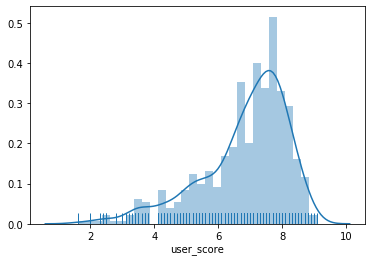

In [70]:
games_data_act = games_data_pl[games_data_pl['genre'] == 'Action']
sns.distplot(games_data_act['user_score'], bins = 30, rug=True)

In [71]:
games_data_act['user_score'].describe()

count    520.000000
mean       6.833654
std        1.365302
min        1.600000
25%        6.300000
50%        7.150000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Построим график по оценкам пользователей по жанру Sports:

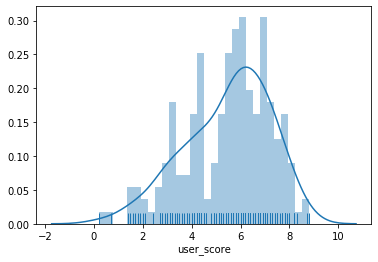

In [72]:
games_data_sp = games_data_pl[games_data_pl['genre'] == 'Sports']
sns.distplot(games_data_sp['user_score'], bins = 30, rug=True)

In [73]:
games_data_sp['user_score'].describe()

count    194.000000
mean       5.466495
std        1.736819
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Сформируем нулевую гипотезу Н0 о том, что средние пользовательские рейтинги жанров Action и Sports равны и альтернативную гипотезу Н1 о том, что средние пользовательские рейтинги жанров Action и Sports отличаются. Уровень статистической значимости установим равный 0.05.

Сначала проверим с помощью критерия Флигнера-Килина, равны ли дисперсии:

In [74]:
result = st.fligner(games_data_act['user_score'], games_data_sp['user_score'])
print('p-value: ', result[1])

p-value:  7.932907212153939e-06


Значение p-value намного меньше альфа, гипотезу о равенстве дисперсий отвергаем. Поэтому гипотезу о равенстве средних значений будем проверять с помощью ttest_ind с опцией equal_var=False:

In [75]:
result = st.ttest_ind(games_data_act['user_score'], games_data_sp['user_score'], equal_var=False)
print('p-value: ', result[1])

p-value:  5.1613574354387965e-20


Значение p-value меньше критического уровня статистической значимости, соответственно нулевую гипотезу отвергаем и будем придерживаться альтернативной гипотезы о том, что пользовательские рейтинги жанров Action и Sports отличаются.

## 4. Вывод:

В ходе исследования был выделен актуальный период; изучены факторы, оказывающие влияние на продажи игр; составлен портрет пользователя в зависимости от региона; проверены гипотезы. В результате проведенного анализа было выявлено, что наибольшее влияние на продажи оказывает жанр игры. В настоящее время, самыми популярными являются Action, Shooter и Sports. Также на успешность игры не так значительно, но влияет рейтинг критиков, так как изначально при выходе игры пользователи при выборе будут руководствоваться рейтингом. Если говорить о популярных платформах, то это X360, PS4 и PS3. Также, я бы советовала сделать отдельную рекламную кампанию для регионов с иными предпочтениями, таких как Япония. Здесь более половины от суммарных продаж топовых платформ занимает 3DS (50.7%), а самые популярные жанры - Action (30,5%), Shooter (19,6%) и Role-Playing(19,3%). Если выбирать среднее между всеми регионами, то это игры на более поздней платформе PS, набирающей популярность - PS4 (в каждом регионе она есть в топ-5 по продажам: Северная Америка - 21.7%, Европа - 31.3%, Япония - 9.2%) в жанре Action (в каждом регионе в топ-5 по жанрам: Северная Америка - 31.5%, Европа - 33.2%, Япония - 30.5%).